# Redes Neurais e Deep Learning 07

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk

## Carregando a Base de Dados

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [13]:
dataset = pd.read_csv(r"D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Curso\datasets\stroke.csv")

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Pré-processamento da base de dados

1. Remoção de linhas nulas
2. Separação dos dados em X (variáveis independentes) e y (variável dependente)
3. Transformação das variáveis categóricas em numéricas (LabelEncoder e OneHotEncoder)
4. Separação em Teste e Treino
5. Normalização

In [14]:
dataset[dataset.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [15]:
#dataset[dataset.isnull().any(axis=1)] quantas linhas nulas?
dataset = dataset.dropna()

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [17]:
x.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [18]:
x['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

cols = ['ever_married', 'Residence_type'] #unique pra descobrir quantos rótulos únicos
le = LabelEncoder()
x[cols] = x[cols].apply(le.fit_transform)

x.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked
6,Male,74.0,1,1,1,Private,0,70.09,27.4,never smoked
7,Female,69.0,0,0,0,Private,1,94.39,22.8,never smoked
9,Female,78.0,0,0,1,Private,1,58.57,24.2,Unknown
10,Female,81.0,1,0,1,Private,0,80.43,29.7,never smoked
11,Female,61.0,0,1,1,Govt_job,0,120.46,36.8,smokes


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

#https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['gender', 'work_type', 'smoking_status'])], 
                       remainder='passthrough')
x = ct.fit_transform(x)

x[0]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,
         1.  , 228.69,  36.6 ])

In [21]:
colunas = ['ohe1', 'ohe2', 'ohe3', 'ohe4', 'ohe5', 'ohe6', 'ohe7', 'ohe8', 'ohe9', 'ohe10', 'ohe11', 
           'ohe12', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 
           'avg_glucose_level', 'bmi']
pd.DataFrame(x, columns=colunas)

,ohe1,ohe2,ohe3,ohe4,ohe5,ohe6,ohe7,ohe8,ohe9,ohe10,ohe11,ohe12,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,103.08,18.6
4905,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0
4906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6
4907,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[-1.20826556,  1.20826556,  0.        , ..., -1.01692167,
         0.08848464,  0.01166694],
       [ 0.82763263, -0.82763263,  0.        , ...,  0.9833599 ,
         0.24879406, -1.29630823],
       [-1.20826556,  1.20826556,  0.        , ...,  0.9833599 ,
         1.17957246,  0.49422088],
       ...,
       [-1.20826556,  1.20826556,  0.        , ...,  0.9833599 ,
        -0.15969312,  0.40532936],
       [ 0.82763263, -0.82763263,  0.        , ..., -1.01692167,
        -0.07763795,  0.2656427 ],
       [-1.20826556,  1.20826556,  0.        , ...,  0.9833599 ,
        -0.83424475,  0.53231724]])

## Arquitetura de Rede Neural (MLP)
https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

Pontos importantes:
1. Diferença entre Keras e tf.keras
2. Instalar via pip install tensorflow
3. Ciclos: Definir o modelo, compilar, treinar, avaliar e estimar (predizer)
4. Sobre [otimizadores](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
    1. https://ruder.io/optimizing-gradient-descent/
    2. https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/
    3. https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c
    4. TL;DR - Adam costuma convergir mais rápido, enquanto SGD costuma generalizar melhor
5. Sobre [Funções de Erro](https://www.tensorflow.org/api_docs/python/tf/keras/losses):
    1. 'binary_crossentropy' para classificação binária, 'sparse_categorical_crossentropy' para classificação multiclasse e ‘mse‘ (mean squared error) para regressão.

In [24]:
tf.__version__

'2.16.1'

## MLP com Otimizador SGD

In [25]:
#definição do modelo (definir o total de camadas, quantos neurônios cada camada terá, as funções de 
#ativação e como as camadas se interconectam)
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [26]:
#compilar o modelo (definir o algoritmo a computar os gradientes, as métricas capazes de avaliar erros 
#e a função de perda)
ann.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
#treinar o modelo
sgd = ann.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6718 - loss: 0.6251
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9575 - loss: 0.3543
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9508 - loss: 0.2692
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9591 - loss: 0.2100
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9615 - loss: 0.1867
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9563 - loss: 0.1811
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9546 - loss: 0.1828
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9584 - loss: 0.1689
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9546 - loss: 0.1767
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9640 - loss: 0.1489
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9579 - loss: 0.1627
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

## Resultados

In [28]:
# evaluate the model
loss_sgd, acc_sgd = ann.evaluate(x_test, y_test, verbose=2)

loss_sgd, acc_sgd

24/24 - 2s - 77ms/step - accuracy: 0.9552 - loss: 0.1519


(0.1519346982240677, 0.9552238583564758)

In [29]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

np.concatenate([pred_array, test_array], axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) 
#vn, fp(rede disse que é 1, mas é 0), fn (rede disse que é 0, mas é 1), vp

cm

array([[704,   0],
       [ 33,   0]], dtype=int64)

In [31]:
accuracy_score(y_test, y_pred)

0.9552238805970149

## MLP com Otimizador Adam

In [32]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [33]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
adam = ann.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8145 - loss: 0.4719
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.2440
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9618 - loss: 0.1768
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9536 - loss: 0.1775
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9598 - loss: 0.1552
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9590 - loss: 0.1542
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9641 - loss: 0.1381
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9560 - loss: 0.1542
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9634 - loss: 0.1333
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9581 - loss: 0.1476
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9592 - loss: 0.1427
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

## Resultados

In [35]:
# evaluate the model
loss_adam, acc_adam = ann.evaluate(x_test, y_test, verbose=2)

loss_adam, acc_adam

24/24 - 1s - 26ms/step - accuracy: 0.9552 - loss: 0.1429


(0.14288419485092163, 0.9552238583564758)

In [36]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

np.concatenate([pred_array, test_array], axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) 
#vn, fp(rede disse que é 1, mas é 0), fn (rede disse que é 0, mas é 1), vp

cm

array([[704,   0],
       [ 33,   0]], dtype=int64)

In [38]:
accuracy_score(y_test, y_pred)

0.9552238805970149

# Gráficos

In [39]:
import matplotlib.pyplot as plt

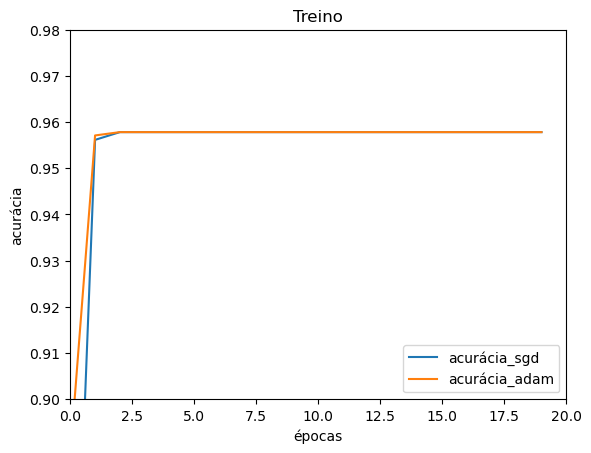

In [40]:
fig, ax = plt.subplots()

ax.plot(sgd.history['accuracy'])
ax.plot(adam.history['accuracy'])
ax.set_xlim(0, 20)
ax.set_ylim(0.90, 0.98)
plt.title('Treino')
plt.ylabel('acurácia')
plt.xlabel('épocas')
plt.legend(['acurácia_sgd', 'acurácia_adam'], loc='lower right')
plt.show()

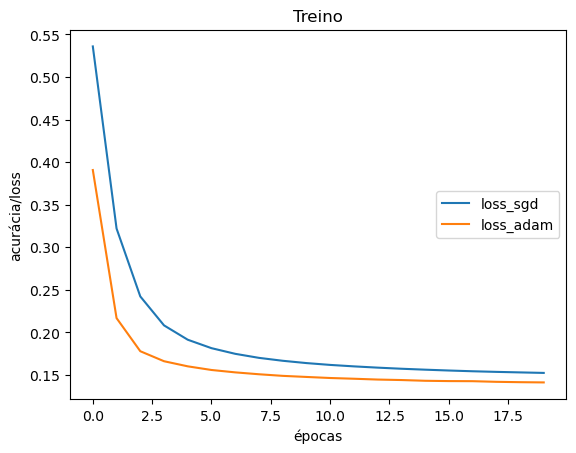

In [41]:
plt.plot(sgd.history['loss'])
plt.plot(adam.history['loss'])
plt.title('Treino')
plt.ylabel('acurácia/loss')
plt.xlabel('épocas')
plt.legend(['loss_sgd', 'loss_adam'], loc='center right')
plt.show()